# Sesión 3: Optimización y ajuste polinómico

In [1]:
# Importar la librerías a utilizar
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spi_op

## Creación de datos para la sesión

Se crean datos para una función cuadrática de tipo $f(x) = y = A*x^2 + B*x + C$ y se grafica

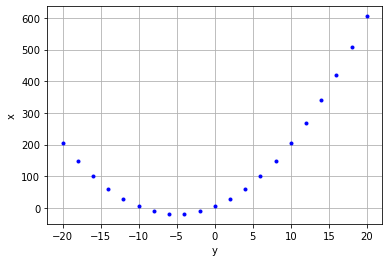

In [2]:
# Coeficientes
A = 1
B = 10
C = 5

# variables x e y
x = np.linspace(-20, 20, 21)
y = np.array(A*x**2 + B*x + C)

# Se grafican los datos
plt.plot(x, y, 'b.', lw=2)
plt.grid(True)
plt.xlabel('y')
plt.ylabel('x')
plt.show()

## Optimización

Al observar el gráfico se puede ver que el mínimo *y* se encuentra cercano al $x = -5$. También en este caso es sencillo calcular la derivada de la función, la cual es $f(x) = 2*A*x + B$. Al igualar a 0 para encontrar el mínimo queda $x = - \frac{B}{2A}$, lo que en este caso efectivamente resulta $x = -5$.

Si bien este caso es sencillo, muchas veces veremos casos que no es posible encontrar el mínimo de una función. Es por esto que existen métodos de optimización para resolver este tipo de problemas. A modo de ejemplo, minimizaremos la misma función y veremos si el resultado coincide con lo calculado anteriormente.

In [3]:
# Definición de la función
def f(x):
    return A*x**2 + B*x + C

Se procede a minimizar la función mediante *minimize_scalar* (*https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar*), este permite minimizar una función que depende sólo de una variable.

In [4]:
# Minimización de la función con método 1
op1 = spi_op.minimize_scalar(f, tol=1e-7)
op1

     fun: -20.0
    nfev: 10
     nit: 4
 success: True
       x: -5.000000000000003

Desde el resultado se puede extraer el valor de la variable independiente que optimiza la función.

In [5]:
# Extracción del resultado
op1.x

-5.000000000000003

Otra opción es utilizar la función *minimize* (*https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize*), la cual se diferencia en que es capaz de trabajar con funciones que dependen de más de una variable

In [6]:
# Minimización de la función con método 2
op2 = spi_op.minimize(f, 1)
op2

      fun: -19.99999999999999
 hess_inv: array([[0.50000001]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([-5.00000009])

## Ajuste polinómico

La optimización también nos sirve para encontrar parámetros de funciones a partir de datos previos. En este caso se encontrarán los parámetros de la eucación cuadrática a partir de la minimización del error, en este caso utilizaremos el *mean absolute error* (MAE): $MAE = \frac{1}{n} \sum_{i=1}^n |y_{real} - y_{ajustado}|$

In [8]:
# Creación de la función a minimizar
def g(z, args = (x,y)):
    aux = y - (z[0]*x**2 + z[1]*x + z[2])
    return sum(abs(aux))/21

Se minimiza la función para encontrar los parámetros de la función cuadrática

In [9]:
# Minimización de la función con método 2
op3 = spi_op.minimize(g, [1, 1, 1])
op3

      fun: 1.59877211152499e-06
 hess_inv: array([[ 1.89294460e-10,  1.24327732e-10, -5.25682760e-09],
       [ 1.24327732e-10,  3.12592959e-08, -2.45859666e-08],
       [-5.25682760e-09, -2.45859666e-08,  6.02790427e-07]])
      jac: array([ 7.7482832 , -0.03432955,  0.0132895 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 292
      nit: 30
     njev: 70
   status: 2
  success: False
        x: array([0.99999999, 9.99999998, 5.00000166])

Se extraen los parámetros

In [10]:
# Extracción del resultado
op3.x

array([0.99999999, 9.99999998, 5.00000166])

También se podría haber utilizado diferentes medidas cuantitativas de error de un modelo, como la diferencia de cuadrados, los errores porcentuales u otra

Finalmente, comentar que python posee la función *polyfit* (*https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*) que permite ajustar los coeficientes de los polinomios directamente. Por detrás esta función utiliza métodos de optimización como el mencionado anteriormente

In [11]:
# Metodología con función de python
np.polyfit(x, y, 2)

array([ 1., 10.,  5.])